# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# This file contains code and write up for Sign Classification

---
## Step 0: Load The Data

Import all modules required in this file first

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from numpy import newaxis
from sklearn.cross_validation import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os
import matplotlib.image as mpimg
import skimage.transform
import scipy.misc
%matplotlib inline

Load data from saved folder. 

Here data is marked original (X_train_orig) because later it will be pre-processed and treated as
X_train and X_test

X_train_orig is also split into training and validation sets

In [2]:
# Load pickled data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_test_orig, y_test_orig = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

This cell shows summary of datasets.

There are 39209 training data and 12630 test images. They are all classified into 43 different classes

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig[0].shape

# TODO: How many unique classes/labels there are in the dataset.
label_df = pd.DataFrame(y_train_orig)
test_label_df = pd.DataFrame(y_test_orig)
n_classes = label_df[0].nunique()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### 43 classes are stored in a file: signnames.csv

Here we plot:
1. Names and class ids stored in the file names
2. Training data Histogram with each bar as unique CLASS ID
3. Test data Histogram with each bar as unique CLASS ID

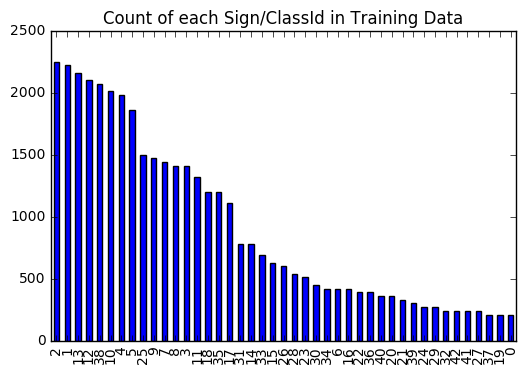

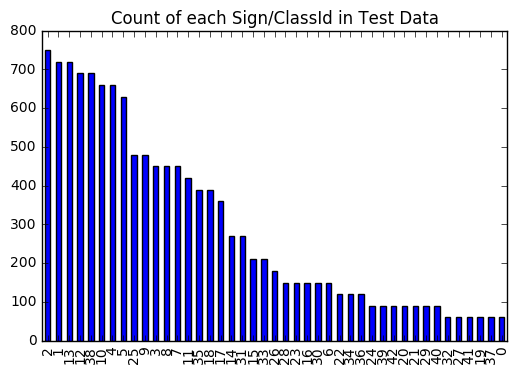

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
plt.figure();

#Plot count of each ClassId in the label training set
label_df[0].value_counts().plot(kind='bar')
plt.title('Count of each Sign/ClassId in Training Data') 
plt.show()

# Plot Test Data
test_label_df[0].value_counts().plot(kind='bar')
plt.title('Count of each Sign/ClassId in Test Data') 
plt.show()

df = pd.read_csv('./signnames.csv')
df



Here we display 10 random images from Training data and also plot its associated class and class id

The visuals help to make sure our training data and labels relationship after reading from different files are still valid and we are ready to process further

Note: Since we are using random 10 images, there will be different images each time this notebook is run



Display:  Image, ClassId and its Classification for 10 random images from Training Set




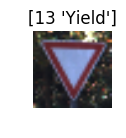

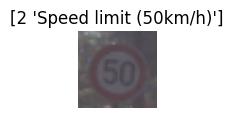

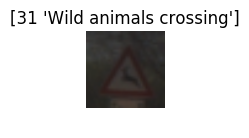

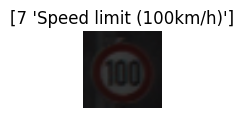

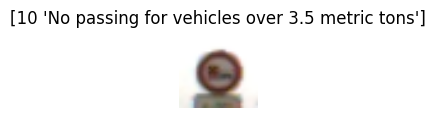

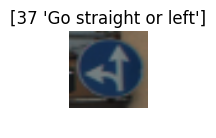

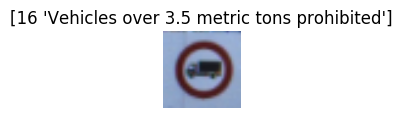

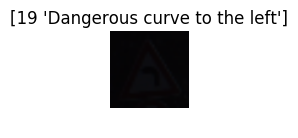

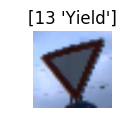

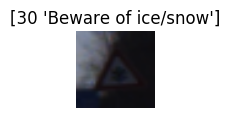

In [5]:
# Get 10 random index from Training data
randomIdx = random.sample(range(0, len(X_train_orig)), 10)
# Convert Pandas df to numpy array for plotting labels
nparr=df.iloc[:,:].values
cnt=0
labels=[]
filedict ={}
print("\n\nDisplay:  Image, ClassId and its Classification for 10 random images from Training Set\n\n")
for i in randomIdx:
    plt.figure(figsize=(1,1))
    image = X_train_orig[i].squeeze()
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title('{}'.format(nparr[y_train_orig[i]])) 


Here i am plotting the image after applying:
1. Rotation
2. Contrast-limited Adaptive Histogram Equalization (CLAHE)

Note: I found that random rotation did not help much in Training Accuracy but CLAHE did. CLAHE is included as part of pre-processing pipeline

This code is only for debug but it is not used anywhere. It is safe to ignore.


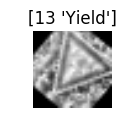

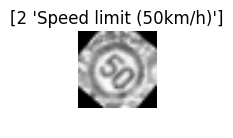

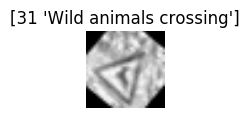

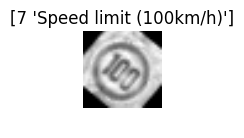

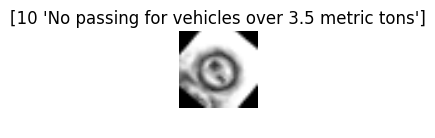

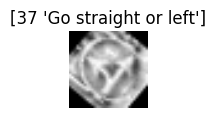

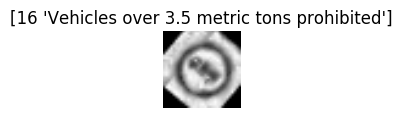

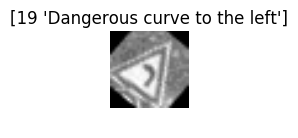

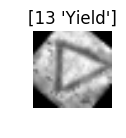

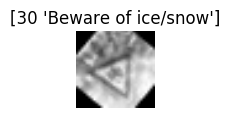

In [6]:

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
       center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

for i in randomIdx:
    plt.figure(figsize=(1,1))
    image = X_train_orig[i].squeeze()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cl1 = clahe.apply(image)
    img = rotate(cl1,-40)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.title('{}'.format(nparr[y_train_orig[i]])) 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

# Pre-process data pipeline

1. Equalize Histogram
2. Contrast-limited Adaptive Histogram Equalization (CLAHE), with tile of 8x8
3. Covert to Gray
4. Normalize by dividing by 255

Apply this pre-processing to Training, Test and final image for prediction

Note: 
 - Training Accuracy was around 90% when using Equalize Histogram on Y Channel with 10 epoch 
 - Training Accuracy was around 96%+ after using just CLAHE method and normalizing with 5 epoch
 - After adding both accuracy was 97%+

    Input: 32 x 32 x 3 (Color image)
    
    Pre-process Output: 32 x 32 x 1 (Gray image)
    
    LeNet Input: 32 x 32 x 1 (Output of pre-process pipeline)
    
Check the Count & Shape of the image after pre-processing has been applied to both Training/Testing


In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Not used in pipeline
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
       center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Not used in pipeline
def random_rotate(data):
    rotated_images = []   
    for image in data: 
        if random.choice([True, False]):
            gray = rotate(image,-30)
            rotated_images.append(gray)
        else:
            rotated_images.append(image)
            
    return np.array(rotated_images) 

#Not used in pipeline
def equalizeHistogram(data):    
    equalize_images = []
    
    for img in data:      
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        equalize_images.append(img_output)
    return np.array(equalize_images)

#-------------------- Above methods tried but removed after no effect on Accuracy ------

def convert2Gray(data):
    gray_images = []   
    for image in data:       
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)        
    return np.array(gray_images)

def scaleX(X):
    X = (X/255)
    return X

# Contrast-limited Adaptive Histogram Equalization
# It works on gray scale images, tile image is set at 8x8 as default
def use_CLAHE(data):
    clahe_images = []
    for img in data:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cl1 = clahe.apply(image)
        clahe_images.append(cl1)
    return np.array(clahe_images)
        
    
def preprocess_orig(data): 
    
    X_train_gray = use_CLAHE(data)
    X_scale = scaleX(X_train_gray)
    X_train_grayaxis = X_scale[..., newaxis]
    return(X_train_grayaxis)

def preprocess(data): 
    X_equalize = equalizeHistogram(data)
    X_train_gray = use_CLAHE(X_equalize)
    X_scale = scaleX(X_train_gray)
    X_train_grayaxis = X_scale[..., newaxis]
    return(X_train_grayaxis)

print("Before: train dims=", X_train_orig.shape)  
print("Before: test dims=", X_test_orig.shape) 
print("Before: y dims=", y_train_orig.shape) 

X_train_preprocessed = preprocess(X_train_orig)
X_test_preprocessed  = preprocess(X_test_orig)
X_train, y_train     = shuffle(X_train_preprocessed, y_train_orig)
X_test, y_test       = shuffle(X_test_preprocessed, y_test_orig)

print("")
print("After: preprocess train=", X_train.shape)
print("After: preprocess test=", X_test.shape)
print("After: y=", y_train.shape)

Before: train dims= (39209, 32, 32, 3)
Before: test dims= (12630, 32, 32, 3)
Before: y dims= (39209,)

After: preprocess train= (39209, 32, 32, 1)
After: preprocess test= (12630, 32, 32, 1)
After: y= (39209,)


### Split Data into Training, Validation and Testing Sets

In [8]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split training set into 80/20 
X_training, X_validation1, y_training, y_validation1 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Shuffle the training set
X_train, y_train = shuffle(X_training, y_training)

# Shuffle the validation set
X_validation, y_validation = shuffle(X_validation1, y_validation1)

print ("size of Original train=", X_train.shape)
print("")
print ("size of new train=", X_training.shape)
print ("size of validation=", X_validation.shape)
print ("size of test=", X_test_preprocessed.shape)

size of Original train= (31367, 32, 32, 1)

size of new train= (31367, 32, 32, 1)
size of validation= (7842, 32, 32, 1)
size of test= (12630, 32, 32, 1)


### Model Architecture

This was important piece in improving accuracy. After playing with different hyperparameters settled on these values.

Here i am selecting LeNet model that was presented in the class.The model was simple but with initial experiments i had got ~95%+ accuracy with selected hyperparameters. However there are more advanced models available that could provide better results. I wanted to see how much accuracy we can get with
basic model and as an advanced step (if time permits) try with different Models (VGG, Inception etc)

However, i improvised the model by:
1. Decreasing the Filter size from 5x5 to 3x3
2. Increased number of Filters in two convolution filters to 16 and 32
3. Chaged number of Hidden layers in Fully connected layers



Input Image: 32 x 32 x 1  
Filter Size: 3 x 3  
Number of Filters: 16  


Output of 1st ConvNet: (Input.height - Filter.height + 1)/stride
                   Eg:  (32 - 5 + 1)/1 = 30
                   Same for width so output = 30 x 30 and 16 channels, one for each feature

*ConvNet*: No padding applied (i.e VALID option)


Max Pooling of 2x2 with stride of 1 so output image after 1st Convolution:  
Input: 30x30x16  
Output: 15x15x16 (i.e (30 - 2 +1)/2 = ceil(14.5) = 15 and 16 channels or depth



*Model*:  
Input (32x32x1)  
ConvNet1 (Filter size 3x3x1, # of Filters: 16, Stride of 1, No Padding) --> Output (30x30x16)  
Relu  
MaxPool (2x2 with stride 1) --> Output (15x15x16)  
ConNet2 (Filter size 3x3x1, # of Filters: 32, Stride of 1, No Padding) --> Output (13x13x32)  
Relu  
MaxPool (2x2 with stride 1) --> Output (6x6x32)  
Flatten (1152 nodes)  
Fully Connected Layer1 ( 1152 --> 800)  
Fully Connected Layer2 ( 800 --> 200)  
Output ( 200 --> 43)


Adam Optimizer with learning rate of 0.001


In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x16.
    # Output = (input.height - filter.height + 1)/stride
    # Eg: (32 - 3 + 1)/1 = 30 height and 30 width with 16 depth
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 16), mean = mu, stddev = sigma), name='C1_W')
    conv1_b = tf.Variable(tf.zeros(16), name='C1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1, name='C1_relu')

    # SOLUTION: Pooling. Input = 30x30x16. Output = 15x15x16.
    #Eg: (30 -2 +1)/2 = ceil(14.5) = 15
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 15x15x16 and Output = 13x13x32.
    # Eg: (15 -3 +1)/1 = 13
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma), name='C2_W')
    conv2_b = tf.Variable(tf.zeros(32), name='C2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 13x13x32. Output = 6x6x32.
    # Eg: (13 - 2 +1)/2 = 6
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 6x6x32. Output = 1152 (36x32).
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1152. Output = 800.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 200.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 200. Output = 43.
    # 43 = Output Classes of Traffic Sign Classifier
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [11]:
rate = 0.001

logits             = LeNet(x)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Run the model defined earlier for 10 Epochs and save the model results in file

To Test, model will be restored from this file

In [13]:
# Set # of Epochs and batch size for the model

# Reduced the batch size to avoid any memory issues on laptop and set epochs to 7
# After 7 Epochs the accuracy started decreasing showing overfitting
# I am not using Dropouts here but using it could be useful
EPOCHS = 6
BATCH_SIZE = 128

In [14]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_training)

    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):       
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #print("offset=",offset, " end=", end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            #print("x=",batch_x, " y=", batch_y)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saveToFile = 'trafficSign_model.ckpt'
    saver = tf.train.Saver()        
    saver.save(sess,saveToFile)
    print("Model saved")

Training... 31367

EPOCH 1 ...
Validation Accuracy = 0.896

EPOCH 2 ...
Validation Accuracy = 0.940

EPOCH 3 ...
Validation Accuracy = 0.961

EPOCH 4 ...
Validation Accuracy = 0.969

EPOCH 5 ...
Validation Accuracy = 0.976

EPOCH 6 ...
Validation Accuracy = 0.979

Model saved


In [15]:
# Test Accuracy on Test Set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.932



# Training & Validation Accuracy: ~97%

# Test Accuracy: ~93%



## Reflection

+ What was the first architecture that was tried and why was it chosen?
 - First two models resulted in 95% and 97% Accuracy and they were good enough and they were chosen as starting point from class lectures. Pre-processing used multiple methods like normalization, scaling, rotation, Histogram Equalization of Y channel etc


+ What were some problems with the initial architecture?
 - The test accuracy was around 89% to 90% so final prediction was much lower. I thought if i improve overall accuracy it would also affect the final prediction. Too many steps in pre-processing but it did not improve accuracy as expected.


+ How was the architecture adjusted and why was it adjusted?
 - Big improvement came by feedback from reviewer to try Contrast-limited Adaptive Histogram Equalization (CLAHE), i tried different rotations on images but it made accuracy worse so removed it.
 
 
+ Which parameters were tuned? How were they adjusted and why?
 - Other improvement came by increasing the number of filters from 6 to 16 and then to 32 in convolution network
 - It is found that smaller filter size is better than larger filter size. LeNet and other inital model had 11x11 or 7x7. I changed this to 3x3 filter size
 - Increasing number of features resulted in accuracy of 98.6%
 - Changed Adam optimize learning rate from 0.003 to 0.001 (Not sure if 0.003 was any better)
 - This helped Test Accuracy to improve from 90% to 92% that was big jump
 
 
+ What are some of the important design choices and why were they chosen?
 - Selecting important pre-processing step
 - Selecting smaller Filter/Kernel size
 - Selecting more number of Filters helped improve accuracy as compared to original ones
 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [16]:
import glob
mydir = "uvs"
file_to_search = mydir+"/*.png"
labels_file = mydir+"/labels.csv"
pred_imgs = glob.glob(file_to_search)
labels_df = pd.read_csv(labels_file)

origImages = [] 
pred_file_labels = []
for i in pred_imgs:
    label_info =[]
    image = mpimg.imread(i)
    head, tail = os.path.split(i)
    fname = head + "/" + tail
    csvidx =labels_df.loc[labels_df['ImageName'] == fname ].index.tolist()
    classid =labels_df.iloc[csvidx]['ClassId'].values
    label =labels_df.iloc[csvidx]['SignName'].values

    r = 32.0 / image.shape[1]
    dim = (32, int(image.shape[0] * r))
    
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    origImages.append(resized)    
    label_info = [classid[0], label[0]]
    pred_file_labels.append(label_info)

In [17]:
# Real world test
# Preprocess the images used for prediction
# This will be fed as an input to our model


# Convert image scaled values of 0 to 0.99 to original values
def convert2Normal(img):
    unscaledValues = []
    unscaledValues = np.ceil( 255*np.array(img))
    unscaledValues = unscaledValues.astype(np.uint8) #very important else CVT fn will not convert
    return unscaledValues


# Note resize will return single channel
def resizeEachImg32(img):
    height = 32
    width = 32
    gray = skimage.transform.resize(img, (height, width))
    return gray


def resizeAllImgs(data):  
    fixedSizeImages = []
    for image in data:
        #print("orig: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
        resized = resizeEachImg32(image)
        normal = convert2Normal(resized)
        fixedSizeImages.append(normal)
    return fixedSizeImages


# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
resizedImages         = resizeAllImgs(origImages) 
processedImgs2Predict = preprocess(resizedImages)


for i in origImages:
    print("orig test img shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))
    #plt.imshow(i)
    #plt.show()
    
print("----**********-----------")
for i in resizedImages:  
    print("after resize shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))
#     plt.figure(figsize=(1,1))
#     plt.imshow(i, cmap="gray")
#     plt.axis('off')
#     plt.show()

print("----**********-----------")
for i in processedImgs2Predict:
    print("after pre-process shape: {0}, min: {1}, max: {2}".format( i.shape, i.min(), i.max()))

    



print("\nReady to test the model from raw images ..")

orig test img shape: (32, 32, 4), min: 0.1882352977991104, max: 1.0
orig test img shape: (32, 32, 4), min: 0.12941177189350128, max: 1.0
orig test img shape: (32, 32, 4), min: 0.08627451211214066, max: 1.0
orig test img shape: (32, 32, 4), min: 0.05098039284348488, max: 1.0
orig test img shape: (32, 32, 4), min: 0.03529411926865578, max: 1.0
orig test img shape: (32, 32, 4), min: 0.22745098173618317, max: 1.0
orig test img shape: (32, 32, 4), min: 0.08235294371843338, max: 1.0
orig test img shape: (32, 32, 4), min: 0.1568627506494522, max: 1.0
orig test img shape: (32, 32, 4), min: 0.0941176488995552, max: 1.0
orig test img shape: (32, 32, 4), min: 0.0117647061124444, max: 1.0
----**********-----------
after resize shape: (32, 32, 4), min: 49, max: 255
after resize shape: (32, 32, 4), min: 34, max: 255
after resize shape: (32, 32, 4), min: 23, max: 255
after resize shape: (32, 32, 4), min: 14, max: 255
after resize shape: (32, 32, 4), min: 10, max: 255
after resize shape: (32, 32, 4), 

In [18]:
# Tensorboard for debug

#file_writer = tf.summary.FileWriter('mygraph', sess.graph)
#!tensorboard --logdir=mygraph  

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Make into numpy array for processing


### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('trafficSign_model.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Model restored.") 

    pred_val               = tf.argmax(logits, 1)
    pred_softmax           = tf.nn.softmax(logits)
    pred_topFive           = tf.nn.top_k(pred_softmax, k=5)

    new_pics_classes,top5  = sess.run([pred_val, pred_topFive], feed_dict={x: processedImgs2Predict})
    

Model restored.


Restore the model created earlier

### Analyze Performance

Print Softmax Probabilities and Plot comparison chart

For Each image 

- It shows what are the top 5 probabilities
- What are the corresponding classes for each probabilities
- Chart showing the probabilties

It plots for all 10 images required to predict from the saved model


Predicted Classes for all new images:  [ 9  4 33  1  3  3 16 18 13 12]



a) Image: 0


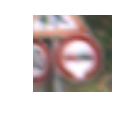

b) Predicted probabilities: [  9.99983430e-01   1.45310823e-05   1.39858639e-06   3.18411821e-07
   1.58514382e-07]
c) Predicted classes: [ 9 35 10 15  3]
d) Predicted classid by model= 9
e) Actual classid & desc of image= [9, 'No passing']


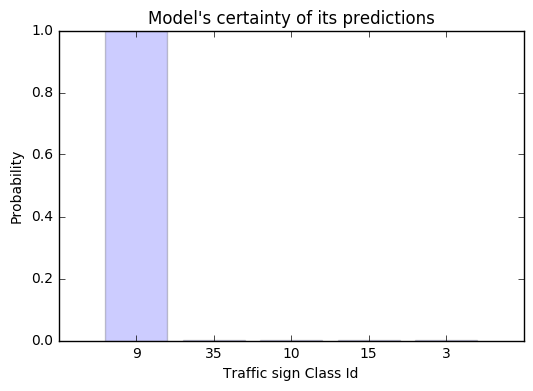


a) Image: 1


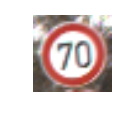

b) Predicted probabilities: [  9.99999285e-01   7.50298057e-07   3.48114959e-09   1.19336471e-10
   2.29666893e-12]
c) Predicted classes: [ 4  1  7 33  2]
d) Predicted classid by model= 4
e) Actual classid & desc of image= [4, 'Speed limit (70km/h)']


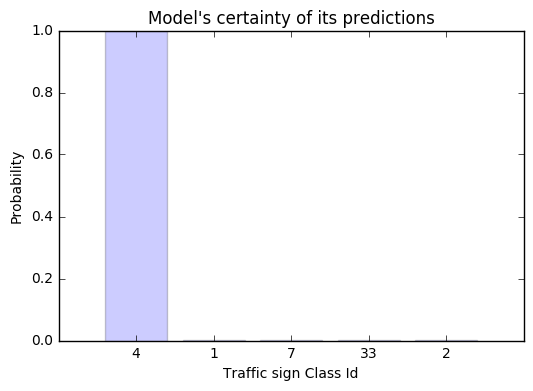


a) Image: 2


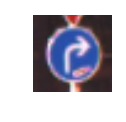

b) Predicted probabilities: [  9.99995112e-01   2.21205937e-06   1.54343911e-06   4.59087175e-07
   4.13778025e-07]
c) Predicted classes: [33 35  4 37 34]
d) Predicted classid by model= 33
e) Actual classid & desc of image= [33, 'Turn right ahead']


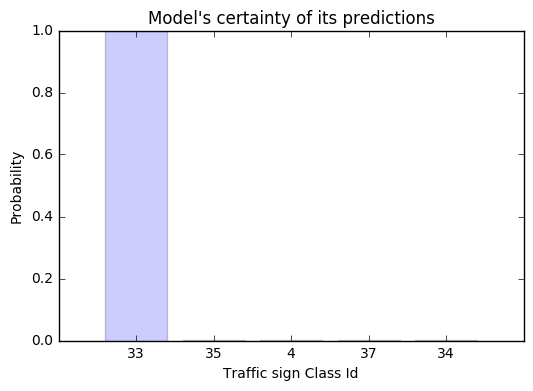


a) Image: 3


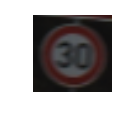

b) Predicted probabilities: [  9.99966621e-01   3.26468398e-05   6.50991012e-07   1.45699687e-07
   5.02182331e-08]
c) Predicted classes: [1 5 2 0 4]
d) Predicted classid by model= 1
e) Actual classid & desc of image= [1, 'Speed limit (30km/h)']


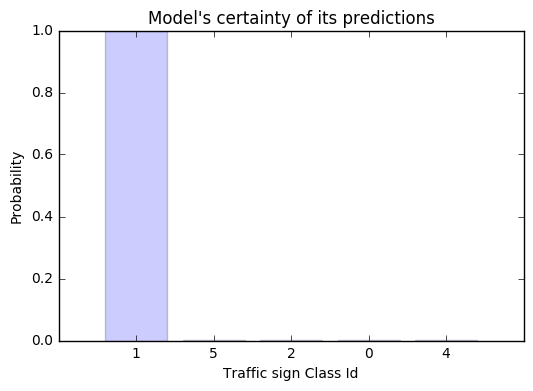


a) Image: 4


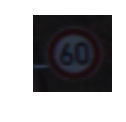

b) Predicted probabilities: [  9.99994874e-01   5.17367243e-06   5.69584158e-09   4.83126490e-11
   3.88262079e-12]
c) Predicted classes: [ 3  5  2 16  1]
d) Predicted classid by model= 3
e) Actual classid & desc of image= [3, 'Speed limit (60km/h)']


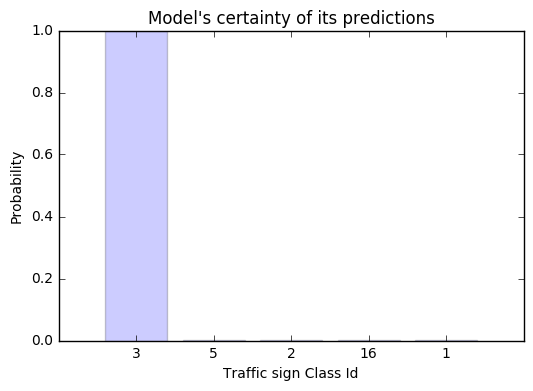


a) Image: 5


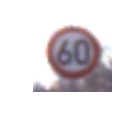

b) Predicted probabilities: [  9.99957204e-01   2.74763552e-05   1.53759283e-05   2.01330552e-09
   5.96862171e-10]
c) Predicted classes: [ 3  5  2  1 29]
d) Predicted classid by model= 3
e) Actual classid & desc of image= [3, 'Speed limit (60km/h)']


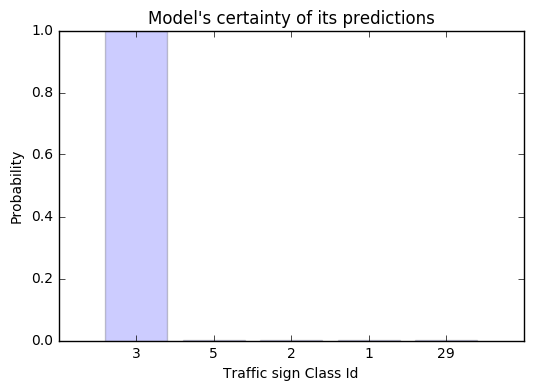


a) Image: 6


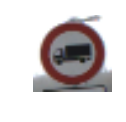

b) Predicted probabilities: [  9.99680281e-01   1.99765549e-04   4.77244866e-05   4.23157617e-05
   1.16926340e-05]
c) Predicted classes: [16  5 40 10 35]
d) Predicted classid by model= 16
e) Actual classid & desc of image= [16, 'Vehicles over 3.5 metric tons prohibited']


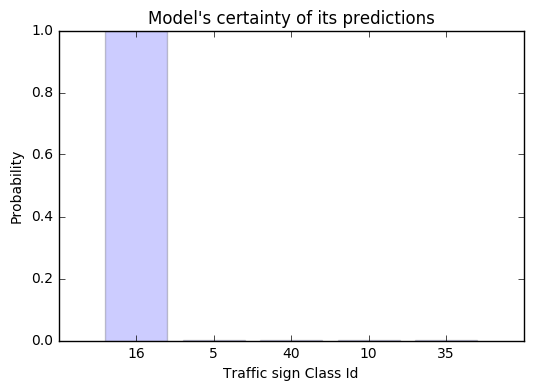


a) Image: 7


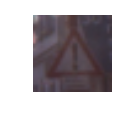

b) Predicted probabilities: [  9.27110016e-01   7.15013444e-02   7.03517348e-04   3.95066774e-04
   2.14583808e-04]
c) Predicted classes: [18 26 24 22 28]
d) Predicted classid by model= 18
e) Actual classid & desc of image= [18, 'General caution']


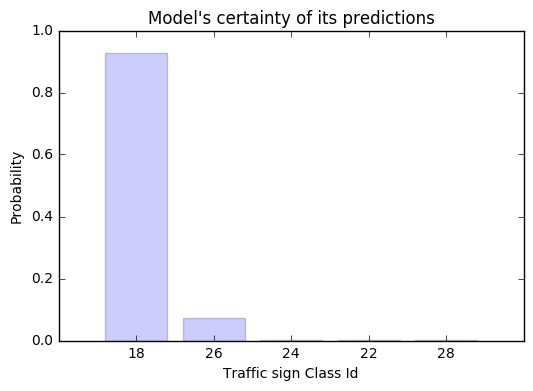


a) Image: 8


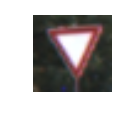

b) Predicted probabilities: [  9.99994636e-01   5.24279039e-06   1.02665382e-07   7.54147411e-09
   3.25405725e-09]
c) Predicted classes: [13 35 15 25 28]
d) Predicted classid by model= 13
e) Actual classid & desc of image= [13, 'Yield']


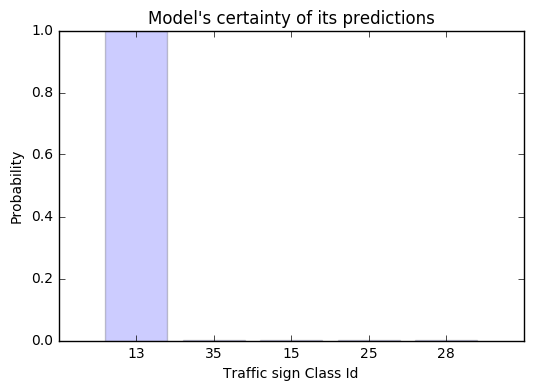


a) Image: 9


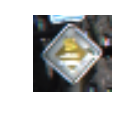

b) Predicted probabilities: [  9.95374501e-01   3.26589751e-03   1.13601133e-03   1.45724305e-04
   4.30551154e-05]
c) Predicted classes: [12  9 40 23 20]
d) Predicted classid by model= 12
e) Actual classid & desc of image= [12, 'Priority road']


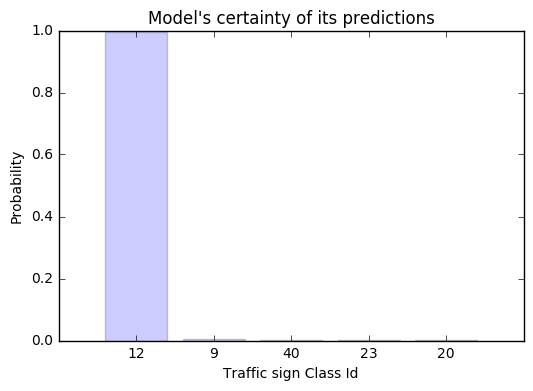

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#tf.reset_default_graph()

print('\nPredicted Classes for all new images: ', new_pics_classes)
print("\n")

#nparr2=df3.iloc[:,:].values
wrong_prediction_cnt=0
def plot_probability(probabilities, labels):
    """Plot model's probabilities (y) and traffic sign labels (x) 
    in a bar chart.
    """
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, probabilities, align='center', alpha=0.2)
    plt.xticks(y_pos, labels)
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign Class Id')
    plt.title('Model\'s certainty of its predictions')
    plt.show()

for idx, val in enumerate(new_pics_classes):
    img = origImages[idx]
    predicted_class = new_pics_classes[idx]
    actual_class = pred_file_labels[idx]
    classid = actual_class[0]
    if(predicted_class != classid):
        wrong_prediction_cnt = wrong_prediction_cnt + 1 
        
    print('\na) Image:', idx)
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print('b) Predicted probabilities:', top5[0][idx])
    print('c) Predicted classes:', top5[1][idx])
    print("d) Predicted classid by model=" , predicted_class)
    print("e) Actual classid & desc of image=" , actual_class)
    plot_probability(top5[0][idx],top5[1][idx])


    

In [21]:
total=idx+1
print("\nModel Prediction accuracy = ","{:.2%}".format(1-(wrong_prediction_cnt/total)))



Model Prediction accuracy =  100.00%


# Training model acuracy: 98%
# Test accuracy: 92%
# Final prediction: 100% accuracy
   


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 